In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, RepeatVector, Concatenate, Lambda
from keras.utils.generic_utils import CustomObjectScope

from stuff import get_flickr8k
from flickr8k import shifted_cropped_batch, batch_generator
from stuff import E_DIM, Z_DIM, RESIZE, PERMUTE, BATCH_SIZE, BATCHES, EPOCHS, MAXLEN, PAD_EMPTY, SHIFT

Using TensorFlow backend.


In [2]:
f8k = get_flickr8k()

In [3]:
with CustomObjectScope({'relu6': keras.layers.ReLU(6.),'DepthwiseConv2D': keras.layers.DepthwiseConv2D}):
    m = load_model('ic1.h5')
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
image_encoder (Model)           (None, 100)          3331364     image_input[0][0]                
__________________________________________________________________________________________________
caption_input (InputLayer)      (None, None)         0                                            
__________________________________________________________________________________________________
repeat_vector_1 (RepeatVector)  (None, 1, 100)       0           image_encoder[1][0]              
__________________________________________________________________________________________________
caption_en

P: <beg> a dog is running through the snow . <end> <abs> <abs> <abs> <abs> <abs> <abs> <abs> <abs> <abs> <abs> <abs>
T: <beg> an off-white dog has his mouth open as he bounds through the fenced-in snowy area . <end>


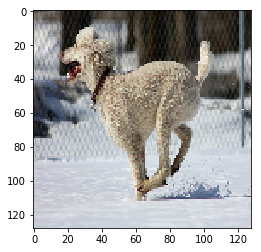

In [10]:
x, y = f8k.next_batch(1, f8k.test_idx, False)

seq = [[f8k.vocab.index(f8k.start)]]
for i in range(MAXLEN):
    hy = m.predict([x[0], np.array(seq)])
    hy_seq = np.argmax(hy, axis=2)
    seq[0].append(hy_seq[0, -1])
print('P:', ' '.join([f8k.vocab[t] for t in seq[0]]))
print('T:', ' '.join([f8k.vocab[t] for t in x[1][0]]))

plt.imshow(x[0][0])
plt.show()